In [2]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(pivottabler)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
count <- function(file) {
    df_search <- read.csv(file)
    print(file)
    print(paste("No. of rows", nrow(df_search)))
    print(unique(df_search$keyword))
    print(length(unique(df_search$video)))
    print(unique(df_search$video))
}

In [4]:
# Training set based on result channels, with evenly distributed instances for each bias class
#file_names <- dir("model/", pattern = "classified_videos_1_2024_2022-01-22_04_57_16.csv")

# Training set based on result channels, with proportionally distributed instances for each bias class
#file_names <- dir("model/", pattern = "classified_videos_1_proportional_2022-01-22_09_32_02.csv")

# Training set based on result videos, with proportionally distributed instances for each bias class
#file_names <- dir("model/", pattern = "classified_videos_1_fromresults_2022-01-22_15_29_42.csv")

file_names <- dir("model/", pattern = "classified_videos_proportional_Dataset5_top152022-01-28_18_36_39.csv")

file_names <- gsub(" ", "", paste("model/",file_names, sep=''))

file_no = 0
for (file in file_names) {
    print(file)
    if (file_no == 0) {
        df_search <- read.csv(file) }
    else {
        df_search_append <- read.csv(file)
        df_search<- rbind(df_search, df_search_append)
    }
file_no =+ 1
}

[1] "model/classified_videos_proportional_Dataset5_top152022-01-28_18_36_39.csv"


In [5]:
total_rows <- nrow(df_search)

## Fxing clsas coding and setting order for plotting

In [6]:
df_search$bias[df_search$bias=="LC"] <- "CL"
df_search$bias[df_search$bias=="RC"] <- "CR"
df_search$bias[df_search$bias==""] <- "NA"
df_search$bias <- factor(df_search$bias,levels = c("R", "CR", "C", "CL", "L", "NA"))

## Removing the videos without transcript

In [7]:
df_search <- df_search %>%
    dplyr::filter(length > 0)

In [8]:
rows_with_transcript <- nrow(df_search)
rows_with_transcript_pct <- rows_with_transcript / total_rows

# Video Counts

In [9]:
paste("Total rows:", total_rows)
paste("Rows with transcripts:", rows_with_transcript)
paste("Rows with transcripts(%):", 100 * round(rows_with_transcript_pct, 4))

[1] "Total rows: 462986"

[1] "Rows with transcripts: 354636"

[1] "Rows with transcripts(%): 76.6"

## Unique Videos

In [10]:
df_search %>%
    #dplyr::group_by(keyword) %>%
    dplyr::summarise(count = n(), "Unique Videos" = n_distinct(video))

count,Unique Videos
<int>,<int>
354636,39326


## Videos by Search Term

In [11]:
df_search %>%
  dplyr::group_by(keyword) %>%
  dplyr::summarise(Count = n(), "Unique Videos" = n_distinct(video))

keyword,Count,Unique Videos
<chr>,<int>,<int>
AOC,10340,1347
Anthony Fauci,11144,2776
Anthony Huber,8495,2195
Barak Obama,9021,2583
Climate Change,10928,2555
Cultural Appropriation,8556,3116
Donald Trump,11988,2977
Feminism,9786,2044
Free Speech,11720,3031


## Videos by A-priori Bias

In [12]:
df_search %>%
    #dplyr::filter(bias != "") %>%
    dplyr::group_by(bias) %>%
    dplyr::summarise(count = n(), UNIQUE_COUNT = n_distinct(video))

bias,count,UNIQUE_COUNT
<fct>,<int>,<int>
R,39414,657
CR,17398,1015
C,42539,2661
CL,36399,4501
L,16863,934
NA,202023,29558


In [13]:
videos_with_apriori_bias <- df_search %>%
    dplyr::filter(bias != "NA") %>%
    nrow()

videos_without_apriori_bias <- df_search %>%
    dplyr::filter(bias == "NA") %>%
    nrow()

videos_without_apriori_bias_pct <- videos_without_apriori_bias / rows_with_transcript

In [14]:
paste("Videos with a-priori bias:", videos_with_apriori_bias)
paste("Videos without a-priori bias:", videos_without_apriori_bias)
paste("Percentage of videos without a-priori bias:", 100 * round(videos_without_apriori_bias_pct, 4))

[1] "Videos with a-priori bias: 152613"

[1] "Videos without a-priori bias: 202023"

[1] "Percentage of videos without a-priori bias: 56.97"

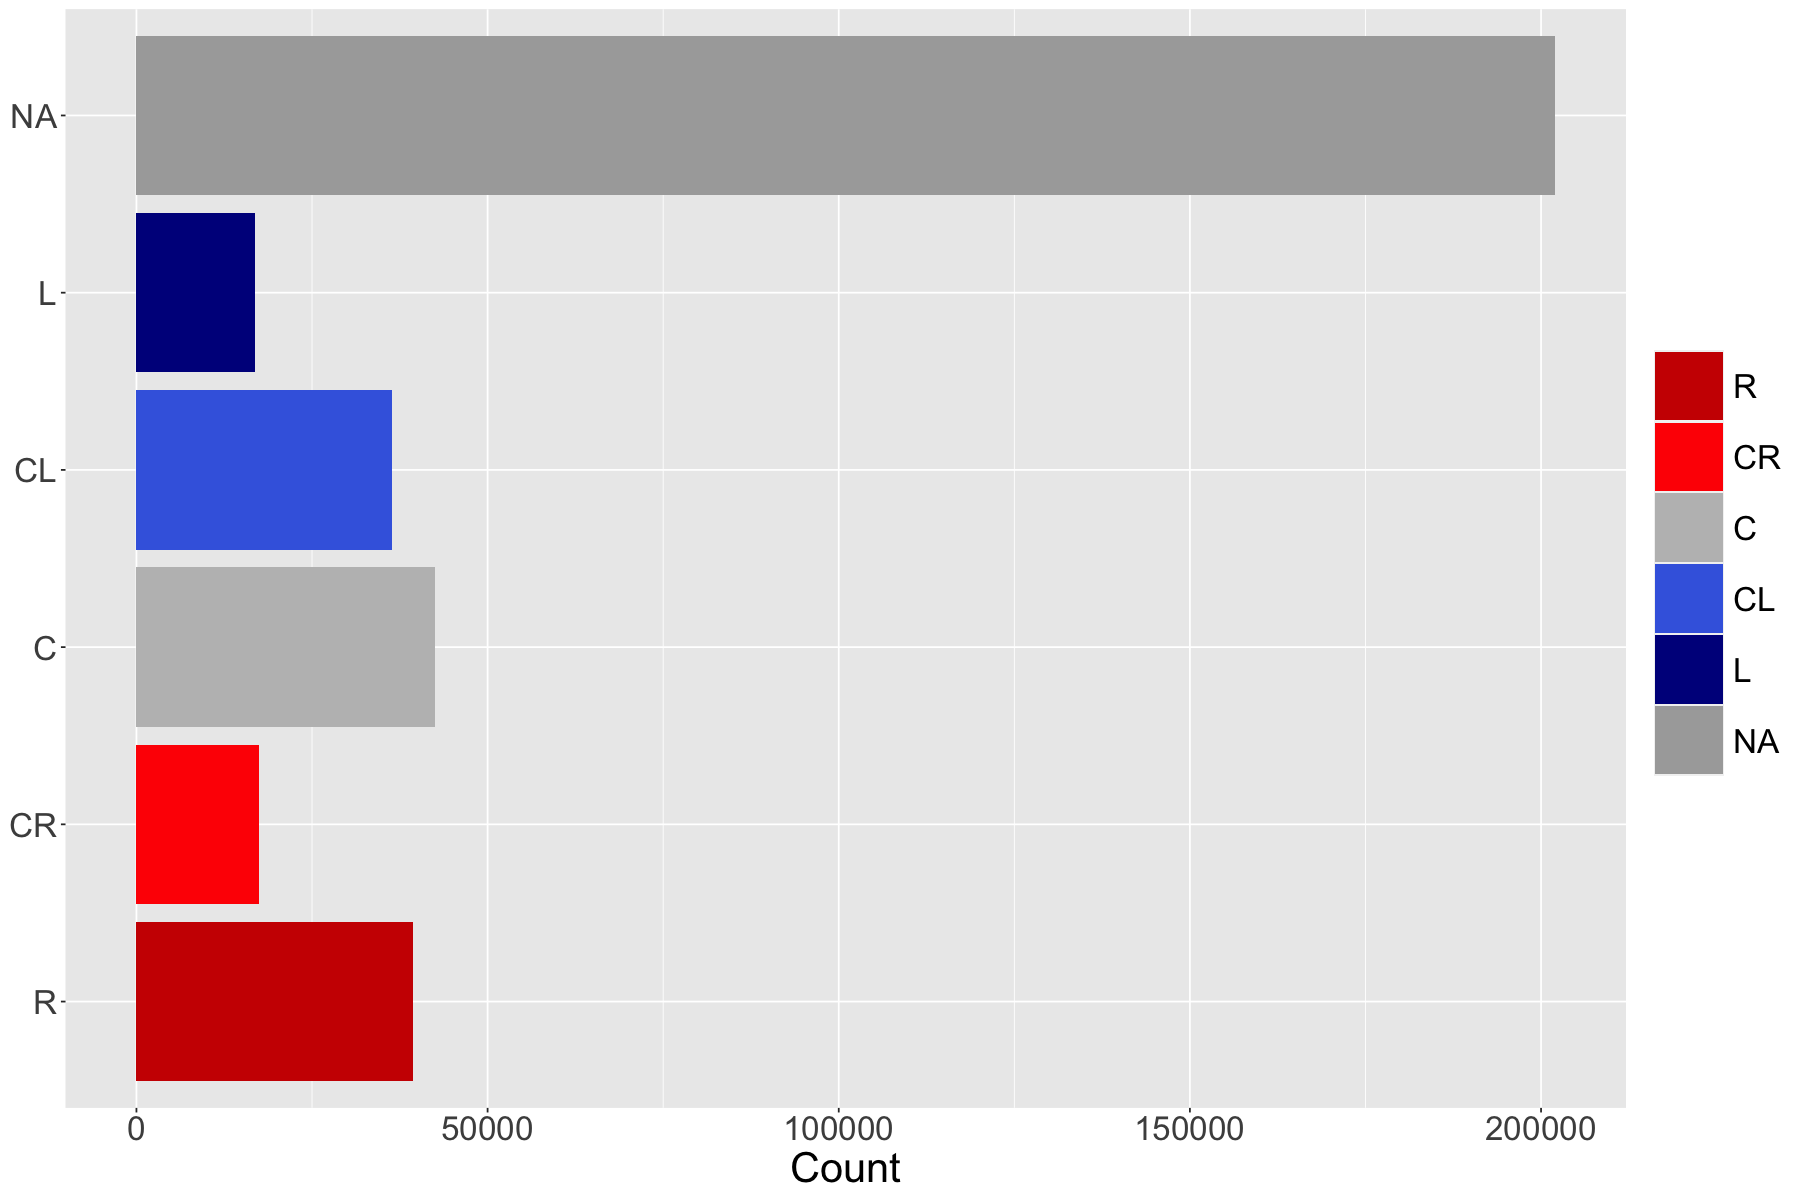

In [15]:
options(repr.plot.width=15, repr.plot.height=10)
    
df_search %>%
    #dplyr::filter(bias != "") %>%
    dplyr::group_by(bias) %>%
    dplyr::summarise(Count = n(), UNIQUE_COUNT = n_distinct(video)) %>%
    ggplot(aes(x = bias, y = Count, fill = bias)) +
        geom_bar(stat = "identity") +
        theme(
            legend.text = element_text(size = 20),
            legend.key.size = unit(1.5, "cm"),
            legend.key.width = unit(1.5, "cm"),
            legend.title = element_blank(),
            axis.text.x = element_text(size = 20),
            axis.text.y = element_text(size = 20),
            axis.title.x = element_text(size = 25),
            axis.title.y = element_blank()
        ) +
        scale_fill_manual(values = c("NA" = "darkgrey",
            "L" = "blue4",
            "CL" = "royalblue",
            "C" = "grey",
            "CR" = "red",
            "R" = "red3")) +
        coord_flip()

In [16]:
df_with_bias <- df_search %>%
    dplyr::filter(bias != "NA")

In [17]:
df_with_bias <- df_search %>%
    dplyr::filter(bias != "NA")

unique_videos_with_apriori_bias <- nrow(distinct(df_with_bias, video))

df_without_bias <- df_search %>%
    dplyr::filter(bias == "NA")

unique_videos_without_apriori_bias <- nrow(distinct(df_without_bias, video))

unique_videos_without_apriori_bias_pct <- unique_videos_without_apriori_bias / (unique_videos_with_apriori_bias + unique_videos_without_apriori_bias)

In [18]:
paste("Unique Videos with a-priori bias:", unique_videos_with_apriori_bias)
paste("Unique Videos without a-priori bias:", unique_videos_without_apriori_bias)
paste("Percentage of unique videos without a-priori bias:", 100 * round(videos_without_apriori_bias_pct, 4))

[1] "Unique Videos with a-priori bias: 9768"

[1] "Unique Videos without a-priori bias: 29558"

[1] "Percentage of unique videos without a-priori bias: 56.97"

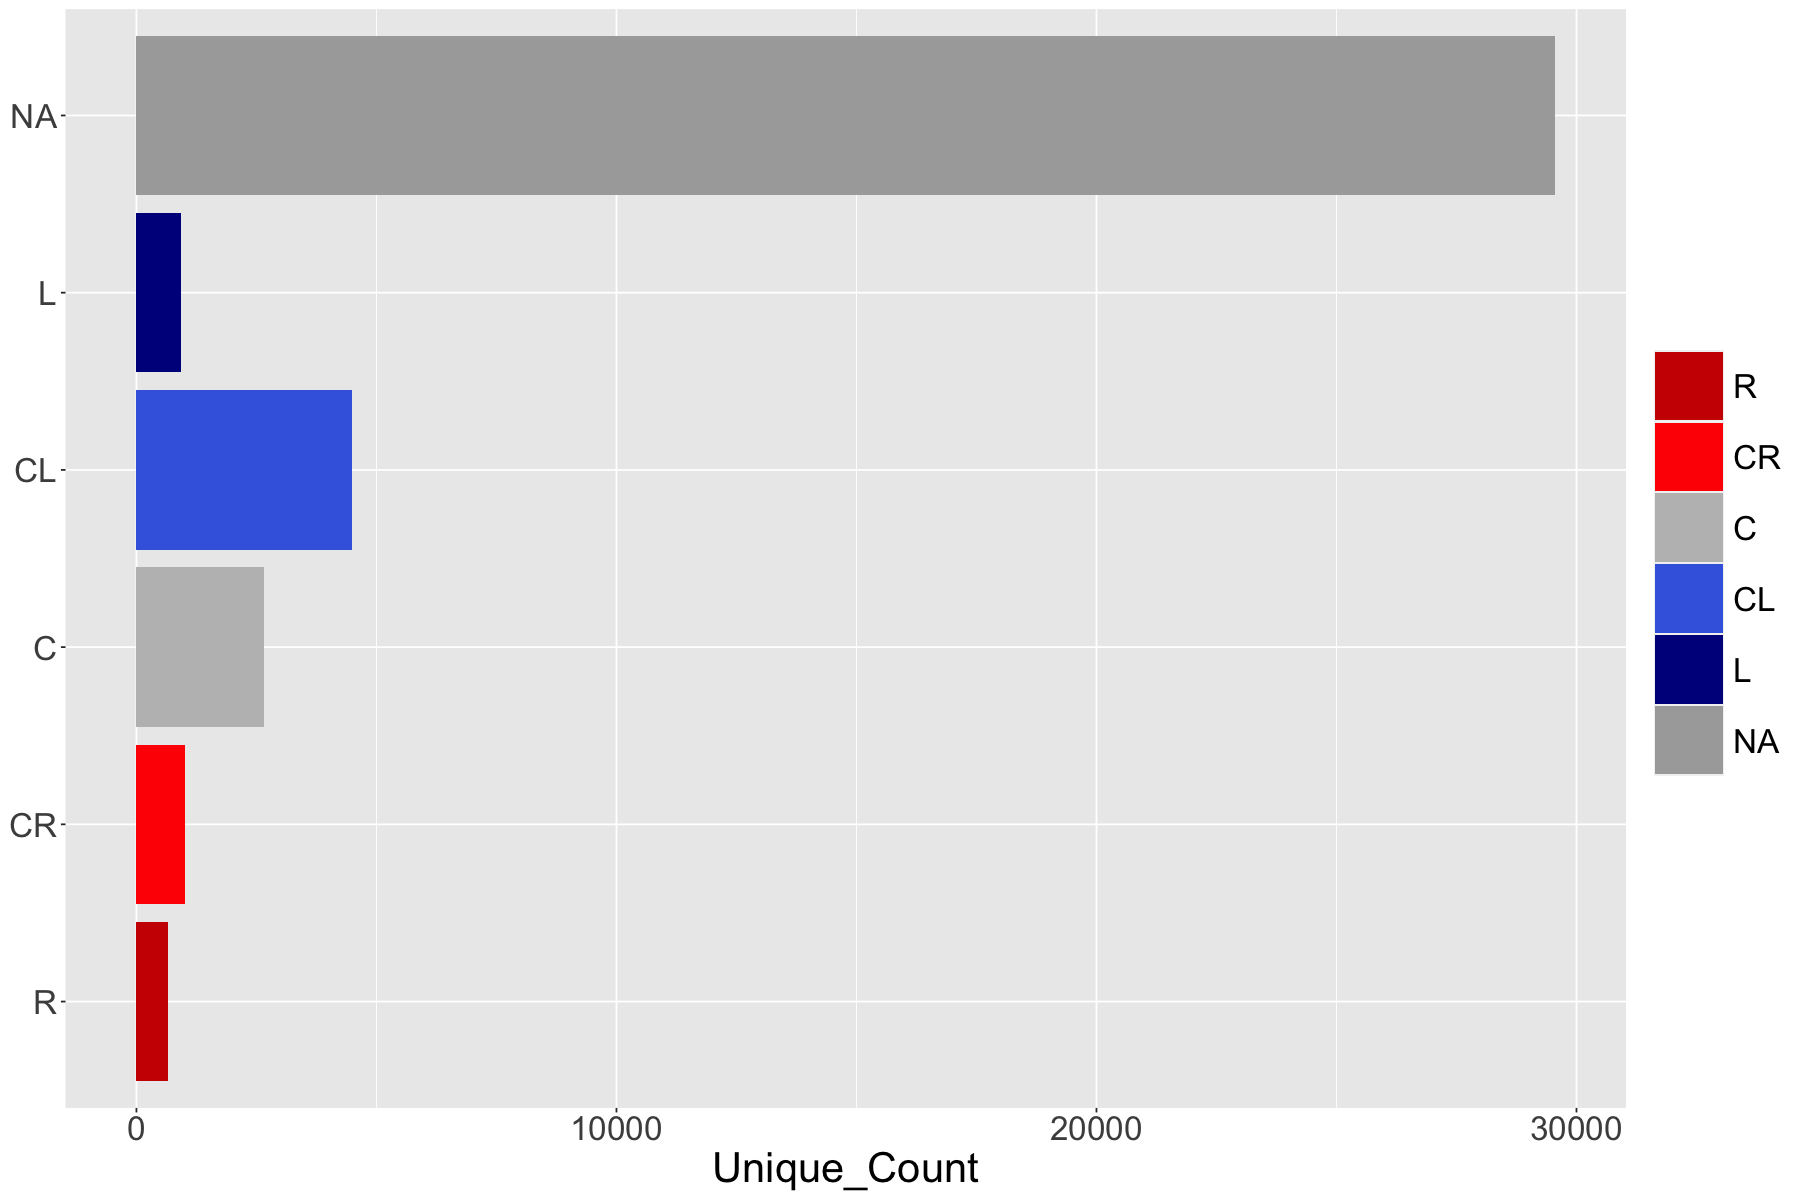

In [19]:
df_search %>%
    #dplyr::filter(bias != "") %>%
    dplyr::group_by(bias) %>%
    dplyr::summarise(Count = n(), Unique_Count = n_distinct(video)) %>%
    ggplot(aes(x = bias, y = Unique_Count, fill = bias)) +
        geom_bar(stat = "identity") +
        theme(
            legend.text = element_text(size = 20),
            legend.key.size = unit(1.5, "cm"),
            legend.key.width = unit(1.5, "cm"),
            legend.title = element_blank(),
            axis.text.x = element_text(size = 20),
            axis.text.y = element_text(size = 20),
            axis.title.x = element_text(size = 25),
            axis.title.y = element_blank()
        ) +
        scale_fill_manual(values = c("NA" = "darkgrey",
            "L" = "blue4",
            "CL" = "royalblue",
            "C" = "grey",
            "CR" = "red",
            "R" = "red3")) +
        coord_flip()

# Channels

In [38]:
df_search %>%
    dplyr::select(channel_id) %>%
    dplyr::summarise(UNIQUE_COUNT = n_distinct(channel_id))

UNIQUE_COUNT
<int>
11745


In [41]:
df_search %>%
    dplyr::filter(bias != "NA") %>%
    dplyr::summarise(vcount = n(), channel_title, channel_id, video) %>%
    dplyr::filter(vcount >= 400) %>%
    dplyr::summarise(count = n(), video_UNIQUE_COUNT = n_distinct(video), UNIQUE_COUNT = n_distinct(channel_id)) %>%
    dplyr::arrange(desc(count))

count,video_UNIQUE_COUNT,UNIQUE_COUNT
<int>,<int>,<int>
152613,9768,145


In [45]:
df_search %>%
    dplyr::filter(bias != "NA") %>%
    dplyr::group_by(bias) %>%
    dplyr::summarise(count = n(), UNIQUE_COUNT = n_distinct(video), channel_UNIQUE_COUNT = n_distinct(channel_id)) %>%
    dplyr::filter(count >= 400) %>%
    dplyr::arrange(desc(count))

bias,count,UNIQUE_COUNT,channel_UNIQUE_COUNT
<fct>,<int>,<int>,<int>
C,42539,2661,20
R,39414,657,2
CL,36399,4501,105
CR,17398,1015,8
L,16863,934,10


In [66]:
df_search %>%
    dplyr::filter(bias == "NA") %>%
#    dplyr::group_by(new_bias) %>%
    dplyr::summarise(count = n(), UNIQUE_COUNT = n_distinct(video))
                     #%>%
    #dplyr::filter(count >= 400) %>%
    #dplyr::arrange(desc(count))

count,UNIQUE_COUNT
<int>,<int>
202023,29558


In [64]:
df_search %>%
    dplyr::filter(bias == "NA") %>%
    dplyr::group_by(new_bias) %>%
    dplyr::summarise(count = n(), UNIQUE_COUNT = n_distinct(video))

new_bias,count,UNIQUE_COUNT
<chr>,<int>,<int>
C,64029,7378
CL,126539,20161
CR,8356,1439
L,2300,526
R,799,54


In [67]:
df_search %>%
    #dplyr::filter(bias == "NA") %>%
    dplyr::group_by(Bias) %>%
    dplyr::summarise(count = n(), UNIQUE_COUNT = n_distinct(video))

Bias,count,UNIQUE_COUNT
<fct>,<int>,<int>
R,40213,711
CR,25754,2454
C,106568,10039
CL,162938,24662
L,19163,1460


In [47]:
df_search$Bias[df_search$bias=="L"] <- "L"
df_search$Bias[df_search$bias=="CL"] <- "CL"
df_search$Bias[df_search$bias=="C"] <- "C"
df_search$Bias[df_search$bias=="CR"] <- "CR"
df_search$Bias[df_search$bias=="R"] <- "R"
df_search$Bias[df_search$bias=="NA"] <- df_search$new_bias[df_search$bias=="NA"]

In [48]:
#df_search <- subset(df_search, select = -c(Bias))

In [49]:
df_search$Bias <- factor(df_search$Bias,levels = c("R", "CR", "C", "CL", "L", "NA"))

In [50]:
df_search %>%
    #dplyr::filter(bias == "NA") %>%
    dplyr::group_by(Bias) %>%
    dplyr::summarise(count = n(), UNIQUE_COUNT = n_distinct(video))

Bias,count,UNIQUE_COUNT
<fct>,<int>,<int>
R,40213,711
CR,25754,2454
C,106568,10039
CL,162938,24662
L,19163,1460


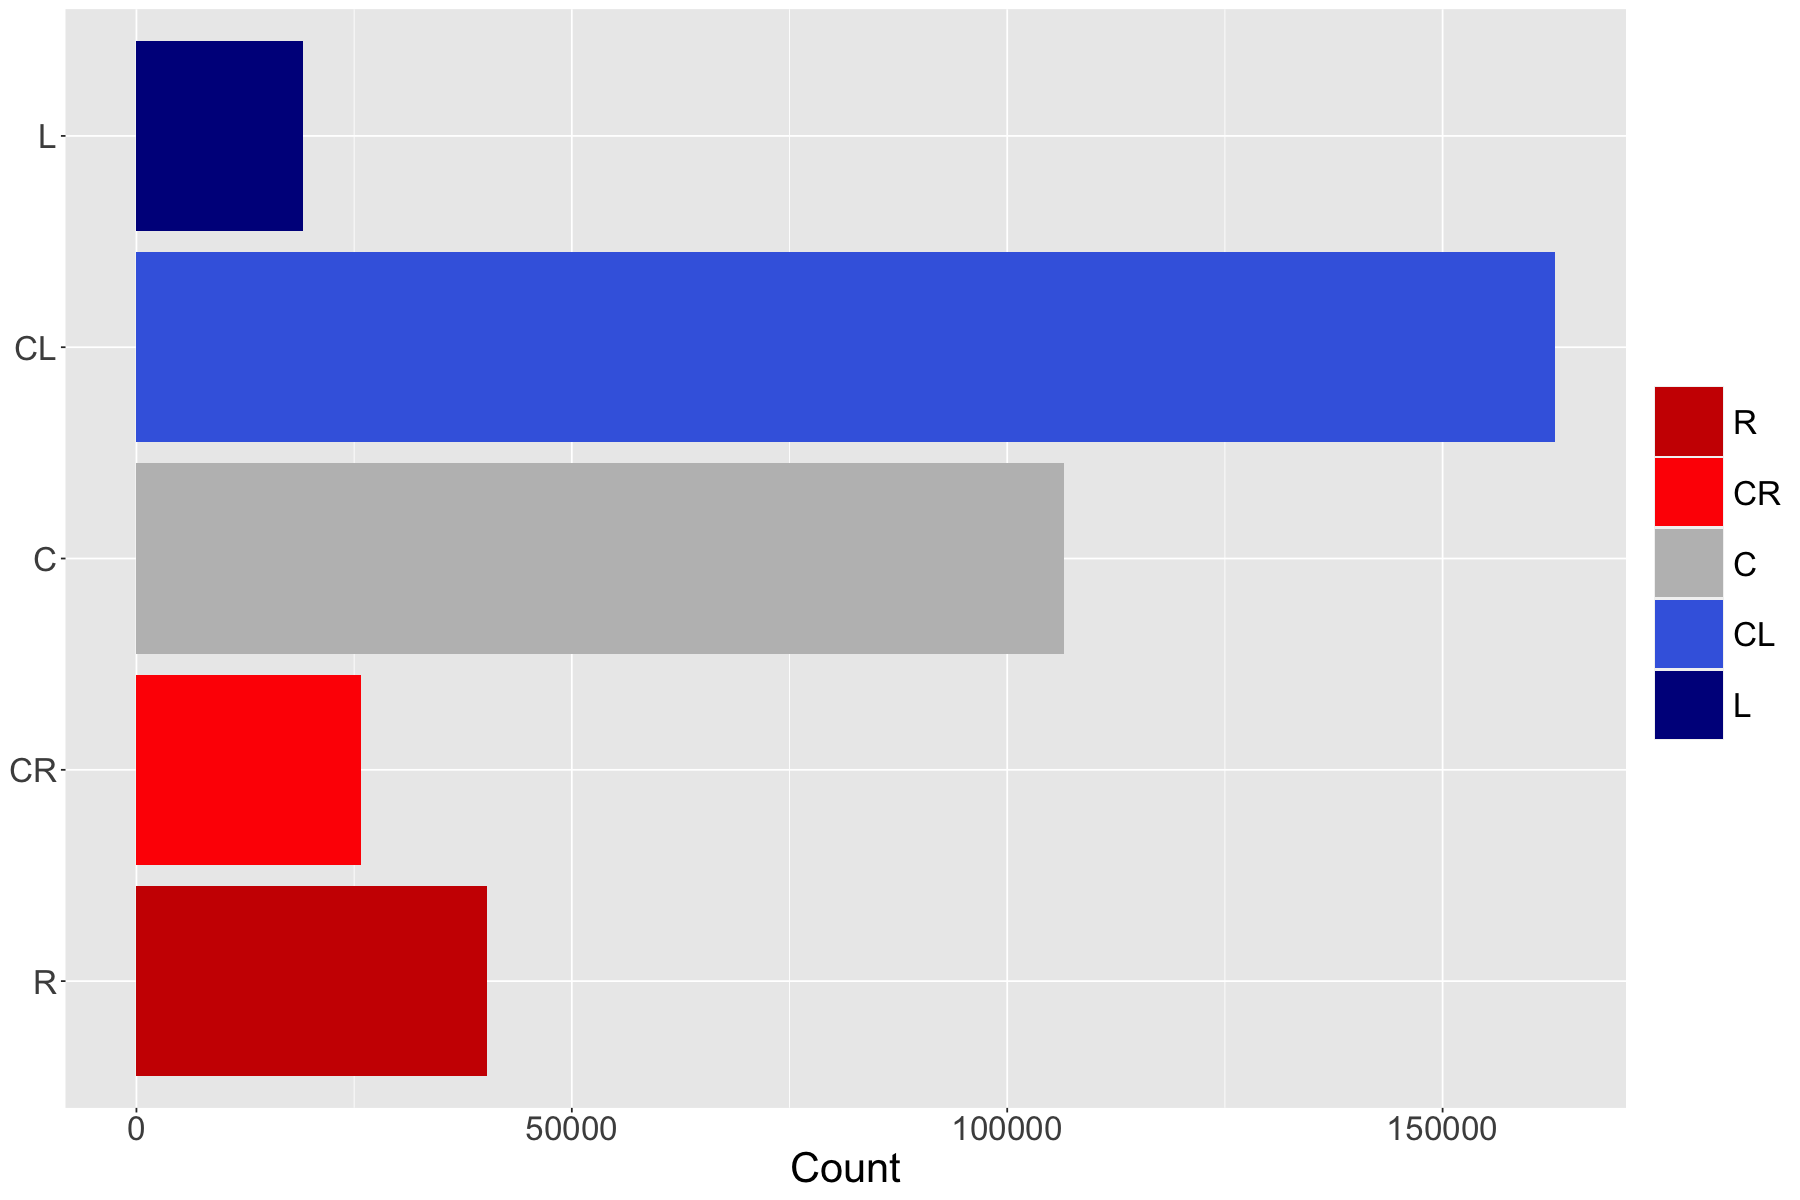

In [52]:
options(repr.plot.width=15, repr.plot.height=10)
    
df_search %>%
    #dplyr::filter(bias != "") %>%
    dplyr::group_by(Bias) %>%
    dplyr::summarise(Count = n()) %>%
    ggplot(aes(x = Bias, y = Count, fill = Bias)) +
        geom_bar(stat = "identity") +
        theme(
            legend.text = element_text(size = 20),
            legend.key.size = unit(1.5, "cm"),
            legend.key.width = unit(1.5, "cm"),
            legend.title = element_blank(),
            axis.text.x = element_text(size = 20),
            axis.text.y = element_text(size = 20),
            axis.title.x = element_text(size = 25),
            axis.title.y = element_blank()
        ) +
        scale_fill_manual(values = c("NA" = "darkgrey",
            "L" = "blue4",
            "CL" = "royalblue",
            "C" = "grey",
            "CR" = "red",
            "R" = "red3")) +
        coord_flip()

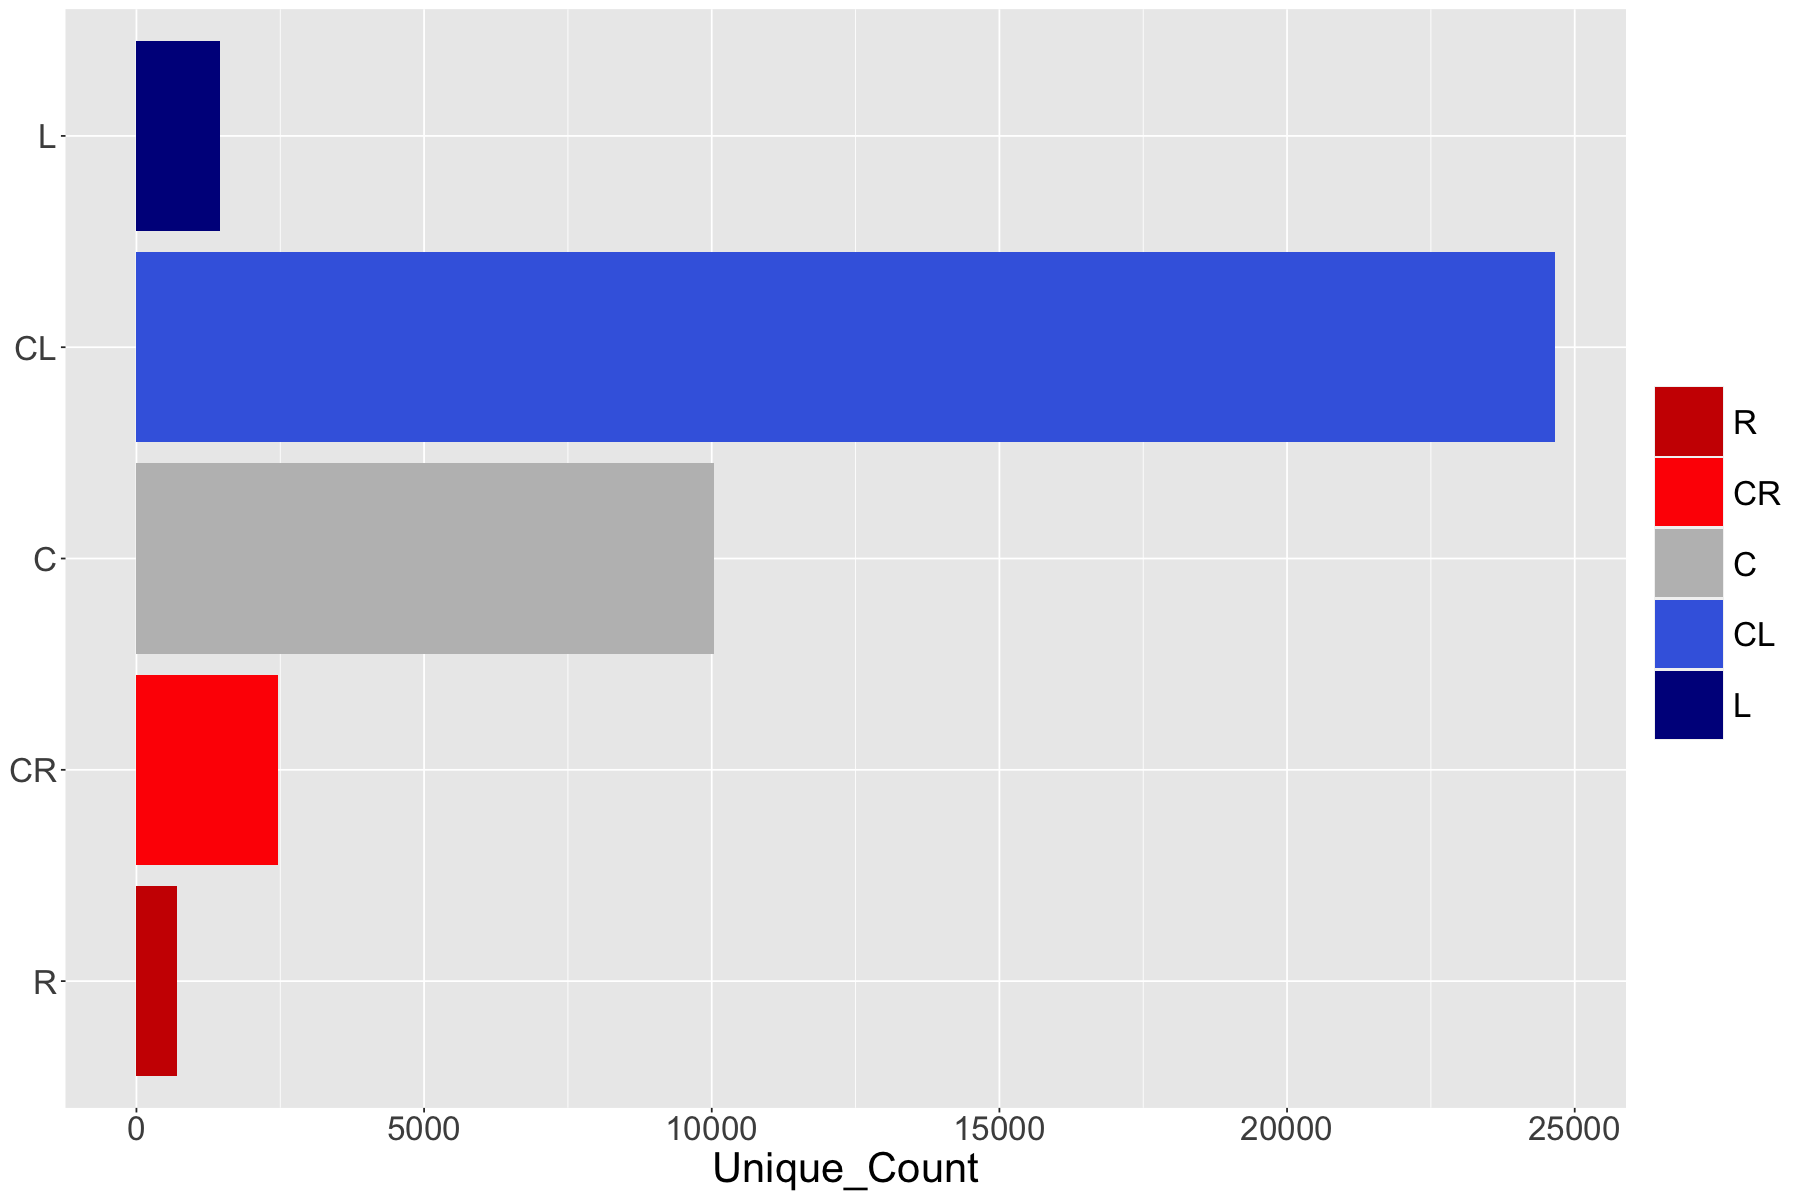

In [53]:
df_search %>%
    #dplyr::filter(bias != "") %>%
    dplyr::group_by(Bias) %>%
    dplyr::summarise(Count = n(), Unique_Count = n_distinct(video)) %>%
    ggplot(aes(x = Bias, y = Unique_Count, fill = Bias)) +
        geom_bar(stat = "identity") +
        theme(
            legend.text = element_text(size = 20),
            legend.key.size = unit(1.5, "cm"),
            legend.key.width = unit(1.5, "cm"),
            legend.title = element_blank(),
            axis.text.x = element_text(size = 20),
            axis.text.y = element_text(size = 20),
            axis.title.x = element_text(size = 25),
            axis.title.y = element_blank()
        ) +
        scale_fill_manual(values = c("NA" = "darkgrey",
            "L" = "blue4",
            "CL" = "royalblue",
            "C" = "grey",
            "CR" = "red",
            "R" = "red3")) +
        coord_flip()

In [146]:
df_channels <- read.csv("model/unique_channels.csv")

In [147]:
joined_channels <- left_join(df_channels, df_search, 
              by = c("channel_id" = "channel_id"))

In [148]:
joined_channels %>%
    #dplyr::filter(bias == "NA") %>%
    #dplyr::group_by(current_depth, Bias) %>%
    dplyr::summarise(count = n())

count
<int>
152625


In [149]:
nrow(df_channels)

[1] 157

In [ ]:
joined_channels %>%
    #dplyr::filter(bias == "NA") %>%
    #dplyr::group_by(current_depth, Bias) %>%
    dplyr::summarise(count = n())

In [150]:
df_search %>%
    dplyr::summarise(UNIQUE_COUNT = n_distinct(channel_id))

UNIQUE_COUNT
<int>
11745


In [22]:
df_search$lsd_sentiment <- 'neutral'
df_search$lsd_sentiment[df_search$lsd_ratio > 0.4] <- 'positive'
df_search$lsd_sentiment[df_search$lsd_ratio < 0.4] <- 'negative'

df_search$afinn_sentiment <- 'neutral'
df_search$afinn_sentiment[df_search$afinn_ratio > 0.4] <- 'positive'
df_search$afinn_sentiment[df_search$afinn_ratio < 0.4] <- 'negative'

df_search$geninqposneg_sentiment <- 'neutral'
df_search$geninqposneg_sentiment[df_search$geninqposneg_ratio > 0.4] <- 'positive'
df_search$geninqposneg_sentiment[df_search$geninqposneg_ratio < 0.4] <- 'negative'

df_search$huliu_sentiment <- 'neutral'
df_search$huliu_sentiment[df_search$huliu_ratio > 0.4] <- 'positive'
df_search$huliu_sentiment[df_search$huliu_ratio < 0.4] <- 'negative'

In [23]:
df_search <- subset(df_search, select = c(keyword, video, parent_video, current_depth, trace, parent_trace, bias, new_bias, channel_title, channel_id, length, lm, lgpp, nrc_el, lsd_sentiment, afinn_sentiment, geninqposneg_sentiment, huliu_sentiment))

In [24]:
df_search %>%
  dplyr::group_by(keyword) %>%
  dplyr::summarise(count = n(), UNIQUE_COUNT = n_distinct(video))

keyword,count,UNIQUE_COUNT
<chr>,<int>,<int>
AOC,11587,1604
Anthony Fauci,12187,3186
Anthony Huber,11114,2437
Barak Obama,9795,2921
Climate Change,11851,2806
Cultural Appropriation,9054,3369
Donald Trump,12880,3277
Feminism,10041,2164
Free Speech,12954,3376


In [134]:
df_search$apriori_bias <- df_search$bias

In [135]:
df_search %>%
  dplyr::group_by(apriori_bias) %>%
  dplyr::summarise(count = n(), UNIQUE_COUNT = n_distinct(video))

apriori_bias,count,UNIQUE_COUNT
<chr>,<int>,<int>
,236227,33588
C,43418,2713
L,16865,936
LC,42982,4677
R,39607,669
RC,20518,1098


In [136]:
df_search %>%
    dplyr::filter(apriori_bias == "") %>%
    dplyr::group_by(new_bias) %>%
    dplyr::summarise(count = n(), UNIQUE_COUNT = n_distinct(video))

new_bias,count,UNIQUE_COUNT
<chr>,<int>,<int>
CL,236227,33588


In [141]:
df_search %>%
  dplyr::group_by(keyword, apriori_bias) %>%
  dplyr::summarise(count = n(), UNIQUE_COUNT = n_distinct(video))

`summarise()` has grouped output by 'keyword'. You can override using the `.groups` argument.



keyword,apriori_bias,count,UNIQUE_COUNT
<chr>,<chr>,<int>,<int>
AOC,,5752,1233
AOC,C,162,51
AOC,L,34,11
AOC,LC,286,102
AOC,R,4575,115
AOC,RC,778,92
Anthony Fauci,,9378,2517
Anthony Fauci,C,1249,270
Anthony Fauci,L,569,67


In [137]:
# These records will be assigned the predicted bias
df_search %>%
    dplyr::filter(apriori_bias == "") %>%
    dplyr::count(apriori_bias, new_bias)

apriori_bias,new_bias,n
<chr>,<chr>,<int>
,CL,236227


In [138]:
df_search$bias[df_search$apriori_bias == ""] <- df_search$new_bias[df_search$apriori_bias == ""]

In [139]:
df_search %>%
    dplyr::filter(apriori_bias == "") %>%
    dplyr::count(apriori_bias, bias)

apriori_bias,bias,n
<chr>,<chr>,<int>
,CL,236227


In [140]:
df_search %>%
    dplyr::filter(apriori_bias != "") %>%
    dplyr::count(apriori_bias)

apriori_bias,n
<chr>,<int>
C,43418
L,16865
LC,42982
R,39607
RC,20518


In [124]:
df_search %>%
    dplyr::filter(apriori_bias != "") %>%
    dplyr::count(channel_title, apriori_bias, sort = TRUE)

channel_title,apriori_bias,n
<chr>,<chr>,<int>
Fox News,R,39482
MIT OpenCourseWare,C,19834
Forbes Breaking News,RC,13473
TEDx Talks,C,11454
Vanity Fair,L,9065
MSNBC,L,4736
LastWeekTonight,LC,4129
GQ,LC,3567
Fox Business,RC,3469


In [125]:
df_search %>%
    dplyr::count(bias)

bias,n
<chr>,<int>
C,43419
CL,57421
CR,178800
L,16865
LC,42982
R,39612
RC,20518


In [45]:
df_search %>%
  dplyr::summarise(UNIQUE_COUNT = n_distinct(video))

UNIQUE_COUNT
<int>
43681


In [50]:
head(df_search[c(2,7)])

,video,new_bias
,<chr>,<chr>
1,BXgQZXQnfhA,LC
2,L8SS7LCsAZQ,LC
3,8fD5hrH8zmc,LC
4,L8SS7LCsAZQ,LC
5,8fD5hrH8zmc,LC
6,L8SS7LCsAZQ,LC


In [51]:
df_count_classes <- df_search[!duplicated(df_search[c(2,7)]), ]

In [52]:
df_count_classes %>%
  dplyr::group_by(new_bias) %>%
  dplyr::summarise(n = n())

new_bias,n
<chr>,<int>
C,3968
L,640
LC,37081
R,290
RC,1702


# Preparing for Plotting

In [72]:
df_search$new_bias[df_search$new_bias=='LC'] <- 'CL'
df_search$new_bias[df_search$new_bias=='RC'] <- 'CR'

# Charting Functions

In [83]:
plotLaverGarry <- function(df, file_prefix ,verbose) {
    
    df_lgpp <- df %>%
      dplyr::filter(!is.na(lgpp)) %>%
      dplyr::count(current_depth, lgpp)

    df_lgpp$order <- order(df_lgpp$current_depth, df_lgpp$n)
    
    df_lgpp_0<-df_lgpp[df_lgpp$current_depth==0,]
    df_lgpp_1<-df_lgpp[df_lgpp$current_depth==1,]
    df_lgpp_2<-df_lgpp[df_lgpp$current_depth==2,]
    df_lgpp_3<-df_lgpp[df_lgpp$current_depth==3,]
    df_lgpp_4<-df_lgpp[df_lgpp$current_depth==4,]
    df_lgpp_5<-df_lgpp[df_lgpp$current_depth==5,]

    df_lgpp_0<-arrange(df_lgpp_0, df_lgpp_0$n)
    df_lgpp_1<-arrange(df_lgpp_1, df_lgpp_1$n)
    df_lgpp_2<-arrange(df_lgpp_2, df_lgpp_2$n)
    df_lgpp_3<-arrange(df_lgpp_3, df_lgpp_3$n)
    df_lgpp_4<-arrange(df_lgpp_4, df_lgpp_4$n)
    df_lgpp_5<-arrange(df_lgpp_5, df_lgpp_5$n)

    df_lgpp_0$order<-order(df_lgpp_0$n)
    df_lgpp_1$order<-order(df_lgpp_1$n)
    df_lgpp_2$order<-order(df_lgpp_2$n)
    df_lgpp_3$order<-order(df_lgpp_3$n)
    df_lgpp_4$order<-order(df_lgpp_4$n)
    df_lgpp_5$order<-order(df_lgpp_5$n)

    df_lgpp<- rbind(df_lgpp_0, df_lgpp_1, df_lgpp_2, df_lgpp_3, df_lgpp_4, df_lgpp_5)

    cols <- c(urban='blue', law_and_order='orange', rural='red', culture='red', environment='blue3', economy='green3', values='grey51', groups='chartreuse4', institutions='royalblue3')
    legendTitle <- 'Policy Position'
    
    options(repr.plot.width=15, repr.plot.height=10)
    
    lineplot=ggplot(data = df_lgpp, aes(x=current_depth, y=n)) +
        geom_line(aes(colour=lgpp), size=2) +
        scale_color_manual(legendTitle, values=cols) +
        theme(legend.text=element_text(size=12), legend.title=element_text(size=12)) +
        theme(axis.text=element_text(size=12), axis.title=element_text(size=12,face='bold')) +
        xlab('Recommendation Depth') + ylab('No. of Videos')

    posplot=ggplot(data = df_lgpp, aes(x=current_depth, y=order)) +
        geom_line(aes(colour=lgpp), size=2) +
        scale_color_manual(legendTitle, values=cols) +
        theme(legend.text=element_text(size=12), legend.title=element_text(size=12)) +
        theme(axis.text=element_text(size=12), axis.title=element_text(size=12,face='bold')) +
        xlab('Recommendation Depth') + ylab('Order of Policy Position')

    barplot=ggplot(data = df_lgpp, aes(x=current_depth, y=n, order=lgpp)) + 
        geom_bar(position='fill', stat='identity', aes(fill=lgpp)) +
        scale_fill_manual(legendTitle, values=cols) +
        theme(legend.text=element_text(size=12), legend.title=element_text(size=12)) +
        theme(axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold")) +
        xlab('Recommendation Depth') + ylab('Relative Volume')

    g_lgpp <- arrangeGrob(lineplot, posplot, barplot, nrow = 3)
    
    date = format(Sys.time(), '%Y-%m-%d_%H_%M_%S')
    file_name = paste('plotting/images/', file_prefix, '_lgpp_', date, '.png', sep='')

    ggsave(file=file_name, g_lgpp)
    if (verbose==1){
        grid.arrange(lineplot, posplot, barplot, nrow = 3)        
    }
    
    pt <- PivotTable$new()
    pt$addData(df)
    pt$addColumnDataGroups('current_depth')
    pt$addRowDataGroups('lgpp')
    pt$defineCalculation(calculationName="video", summariseExpression="n()")
    pt$evaluatePivot()
    pt
}

In [84]:
plotNRC_el <- function(df, file_prefix, verbose) {
    
    df_nrc_el <- df %>%
      dplyr::filter(!is.na(nrc_el)) %>%
      dplyr::count(current_depth, nrc_el)

    #df_nrc_el <- df_nrc_el[complete.cases(df_nrc_el),]

    df_nrc_el_0<-df_nrc_el[df_nrc_el$current_depth==0,]
    df_nrc_el_1<-df_nrc_el[df_nrc_el$current_depth==1,]
    df_nrc_el_2<-df_nrc_el[df_nrc_el$current_depth==2,]
    df_nrc_el_3<-df_nrc_el[df_nrc_el$current_depth==3,]
    df_nrc_el_4<-df_nrc_el[df_nrc_el$current_depth==4,]
    df_nrc_el_5<-df_nrc_el[df_nrc_el$current_depth==5,]

    df_nrc_el_0<-arrange(df_nrc_el_0, df_nrc_el_0$n)
    df_nrc_el_1<-arrange(df_nrc_el_1, df_nrc_el_1$n)
    df_nrc_el_2<-arrange(df_nrc_el_2, df_nrc_el_2$n)
    df_nrc_el_3<-arrange(df_nrc_el_3, df_nrc_el_3$n)
    df_nrc_el_4<-arrange(df_nrc_el_4, df_nrc_el_4$n)
    df_nrc_el_5<-arrange(df_nrc_el_5, df_nrc_el_5$n)

    df_nrc_el_0$order<-order(df_nrc_el_0$n)
    df_nrc_el_1$order<-order(df_nrc_el_1$n)
    df_nrc_el_2$order<-order(df_nrc_el_2$n)
    df_nrc_el_3$order<-order(df_nrc_el_3$n)
    df_nrc_el_4$order<-order(df_nrc_el_4$n)
    df_nrc_el_5$order<-order(df_nrc_el_5$n)

    df_nrc_el<- rbind(df_nrc_el_0, df_nrc_el_1, df_nrc_el_2, df_nrc_el_3, df_nrc_el_4, df_nrc_el_5)

    cols <- c(anger='blue', surprise='orange', anticipation='red', disgust='blue4', positive='blue3', fear='green3', negative='grey51', sadness='chartreuse4', joy='royalblue3', trust='red4')
    legendTitle <- 'Emotion'
    
    options(repr.plot.width=15, repr.plot.height=10)
    
    lineplot=ggplot(data = df_nrc_el, aes(x=current_depth, y=n)) +
        geom_line(aes(colour=nrc_el), size=2) +
        scale_color_manual(legendTitle, values=cols) +
        theme(legend.text=element_text(size=12), legend.title=element_text(size=12)) +
        theme(axis.text=element_text(size=12), axis.title=element_text(size=14,face='bold')) +
        xlab('Recommendation Depth') + ylab('No. of Videos')

    posplot=ggplot(data = df_nrc_el, aes(x=current_depth, y=order)) +
        geom_line(aes(colour=nrc_el), size=2) +
        scale_color_manual(legendTitle, values=cols) +
        theme(legend.text=element_text(size=12), legend.title=element_text(size=12)) +
        theme(axis.text=element_text(size=12), axis.title=element_text(size=14,face='bold')) +
        xlab('Recommendation Depth') + ylab('Order of NRC Emotion')

    barplot=ggplot(data = df_nrc_el, aes(x=current_depth, y=n, order=nrc_el)) + 
        geom_bar(position='fill', stat='identity', aes(fill=nrc_el)) +
        scale_fill_manual(legendTitle, values=cols) +
        theme(legend.text=element_text(size=12), legend.title=element_text(size=12)) +
        theme(axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) +
        xlab('Recommendation Depth') + ylab('Relative Volume')

    g_nrc_el <- arrangeGrob(lineplot, posplot, barplot, nrow = 3)
    
    date = format(Sys.time(), '%Y-%m-%d_%H_%M_%S')
    file_name = paste('plotting/images/', file_prefix, '_nrc_el_', date, '.png', sep='')

    ggsave(file=file_name, g_nrc_el)
    if (verbose==1){
        grid.arrange(lineplot, posplot, barplot, nrow = 3)        
    }
    
    pt <- PivotTable$new()
    pt$addData(df)
    pt$addColumnDataGroups('current_depth')
    pt$addRowDataGroups('nrc_el')
    pt$defineCalculation(calculationName="video", summariseExpression="n()")
    pt$evaluatePivot()
    pt
}

In [85]:
plotBias <- function(df, file_prefix, verbose) {

    df_channel_bias <- df %>%
      dplyr::count(current_depth, new_bias)

    df_channel_bias_0<-df_channel_bias[df_channel_bias$current_depth==0,]
    df_channel_bias_1<-df_channel_bias[df_channel_bias$current_depth==1,]
    df_channel_bias_2<-df_channel_bias[df_channel_bias$current_depth==2,]
    df_channel_bias_3<-df_channel_bias[df_channel_bias$current_depth==3,]
    df_channel_bias_4<-df_channel_bias[df_channel_bias$current_depth==4,]
    df_channel_bias_5<-df_channel_bias[df_channel_bias$current_depth==5,]

    df_channel_bias_0<-arrange(df_channel_bias_0, df_channel_bias_0$n)
    df_channel_bias_1<-arrange(df_channel_bias_1, df_channel_bias_1$n)
    df_channel_bias_2<-arrange(df_channel_bias_2, df_channel_bias_2$n)
    df_channel_bias_3<-arrange(df_channel_bias_3, df_channel_bias_3$n)
    df_channel_bias_4<-arrange(df_channel_bias_4, df_channel_bias_4$n)
    df_channel_bias_5<-arrange(df_channel_bias_5, df_channel_bias_5$n)

    df_channel_bias_0$order<-order(df_channel_bias_0$n)
    df_channel_bias_1$order<-order(df_channel_bias_1$n)
    df_channel_bias_2$order<-order(df_channel_bias_2$n)
    df_channel_bias_3$order<-order(df_channel_bias_3$n)
    df_channel_bias_4$order<-order(df_channel_bias_4$n)
    df_channel_bias_5$order<-order(df_channel_bias_5$n)

    df_channel_bias <- rbind(df_channel_bias_0, df_channel_bias_1, df_channel_bias_2, df_channel_bias_3, df_channel_bias_4, df_channel_bias_5)

    df_channel_bias <- transform(df_channel_bias, 
            new_bias.ord = factor(
                 new_bias ,
                 levels=c('L','CL', 'C', 'CR', 'R'),
                 ordered =TRUE))

    cols <- c(L='blue4',CL='royalblue', C='grey', CR='red', R='red3')
    legendTitle <- 'Bias'

    options(repr.plot.width=15, repr.plot.height=10)
    
    lineplot=ggplot(data = df_channel_bias, aes(x=current_depth, y=n)) + geom_line(aes(colour=new_bias.ord), size=2) +
        scale_color_manual(legendTitle, values=cols) +
        theme(legend.text=element_text(size=12), legend.title=element_text(size=12), rect = element_rect(fill = "transparent")) +
        theme(axis.text=element_text(size=12), axis.title=element_text(size=12, face='bold')) +
        xlab('Recommendation Depth') + ylab('No. of Videos')

    posplot=ggplot(data = df_channel_bias, aes(x=current_depth, y=order)) + geom_line(aes(colour=new_bias.ord), size=2) +
        scale_color_manual(legendTitle, values=cols) +
        theme(legend.text=element_text(size=12), legend.title=element_text(size=12)) +
        theme(axis.text=element_text(size=12), axis.title=element_text(size=12, face='bold')) +
        xlab('Recommendation Depth') + ylab('Order of Bias')

    barplot=ggplot(data = df_channel_bias, aes(x=current_depth, y=n, order=new_bias.ord)) + 
        geom_bar(position="fill", stat="identity", aes(fill=new_bias.ord)) + scale_fill_manual(legendTitle, values=cols) +
        theme(legend.text=element_text(size=12), legend.title=element_text(size=12)) +
        theme(axis.text=element_text(size=12), axis.title=element_text(size=12, face="bold")) +
        xlab('Recommendation Depth') + ylab('Relative Volume')

    g_bias <- arrangeGrob(lineplot, posplot, barplot, nrow = 3)
    
    date = format(Sys.time(), '%Y-%m-%d_%H_%M_%S')
    file_name = paste('plotting/images/', file_prefix, '_bias_', date, '.png', sep='')

    ggsave(file=file_name, g_bias)
    if (verbose==1){
        grid.arrange(lineplot, posplot, barplot, nrow = 3)        
    }

    pt <- PivotTable$new()
    pt$addData(df)
    pt$addColumnDataGroups('current_depth')
    pt$addRowDataGroups('new_bias')
    pt$defineCalculation(calculationName="video", summariseExpression="n()")
    pt$evaluatePivot()
    pt
}

# Full Set

In [86]:
keyword <- 'Full'
keyword_prefix <- gsub(" ", "", keyword, fixed = TRUE)

plotBias(df_search, keyword_prefix, 0)
plotLaverGarry(df_search, keyword_prefix, 0)
plotNRC_el(df_search, keyword_prefix, 0)

Saving 7 x 7 in image



       0    1    2     3      4      5       Total   
C       12   24   220   1117   5579   29549   36501  
CL     113  555  2400  10935  50967  256925  321895  
CR       3   14    93    470   2221   11679   14480  
L        1   13   104    438   1907    8775   11238  
R        2   26   129    612   2723   12011   15503  
Total  131  632  2946  13572  63397  318939  399617  

Saving 7 x 7 in image



               0    1    2     3      4      5       Total   
culture         12   85   424   2143   9623   49533   61820  
economy         71  395  1937   8960  42728  218524  272615  
environment           9    38    164    941    4809    5961  
groups           2    3     8     50    189     974    1226  
institutions    31  107   410   1634   7047   31247   40476  
law_and_order    7   21    73    378   1808    8562   10849  
rural                 1     8     48    198    1211    1466  
urban                              2      7      26      35  
values           8   11    48    193    856    4053    5169  
Total          131  632  2946  13572  63397  318939  399617  

Saving 7 x 7 in image



              0    1    2     3      4      5       Total   
anger           2   34   147    728   3156   13964   18031  
anticipation    1    1    15     54    295    1582    1948  
disgust                    2      8     18      23      51  
fear            3    2    16     72    294    1364    1751  
joy                               9     44     460     513  
negative       21   68   262   1268   5876   28687   36182  
positive      101  515  2457  11221  52850  269195  336339  
sadness         1                 3     17     113     134  
surprise                                 1       5       6  
trust           2   12    47    209    846    3546    4662  
Total         131  632  2946  13572  63397  318939  399617  

# By Bias Seed

In [60]:
getChildren <- function(video) {
    #print(video)
    children <- df_keyword_plot[0,]
    next_depth <- as.numeric(video[3]) + 1
    
    if (next_depth < 6) {
        videoId <- video[1]
        key <- video[2]
        fetched <- video[4]
        children <- total %>%
          dplyr::filter(current_depth==next_depth) %>%
          dplyr::filter(parent_video==videoId) %>%
          dplyr::filter(keyword==key) %>%
          dplyr::filter(fetch_time > fetched) %>%
          dplyr::arrange(fetch_time) %>%
          dplyr::slice_min(fetch_time, n=5)

        children <- rbind(children, do.call('rbind', apply(children, 1, getChildren)))
    }
    return(children)
}

In [165]:
bias1 <- 'R'
bias2 <- 'R'
keyword_prefix <- 'Right'

df_keyword_plot <- total %>%
  dplyr::filter(current_depth==0) %>%
  dplyr::filter(Bias==bias1 | Bias==bias2)

df_keyword_plot <- rbind(df_keyword_plot, do.call('rbind', apply(df_keyword_plot, 1, getChildren)))

plotSentimentRatio(df_keyword_plot, keyword_prefix, 0)
plotSentiment(df_keyword_plot, keyword_prefix, 0)
plotBias(df_keyword_plot, keyword_prefix, 0)
plotLaverGarry(df_keyword_plot, keyword_prefix, 0)
plotNRC_el(df_keyword_plot, keyword_prefix, 0)
plotTopic(df_keyword_plot, keyword_prefix, 0)

Saving 7 x 3 in image



          0  1   2    3    4     5      Total  
negative      3   23   71   369   1797   2263  
neutral   4  16  100  485  2220  10647  13472  
positive  3  13   42  239  1293   6861   8451  
Total     7  32  165  795  3882  19305  24186  

Saving 7 x 3 in image



          0  1   2    3    4     5      Total  
negative  2  15   75  288  1381   6821   8582  
positive  5  17   90  507  2501  12484  15604  
NA            3    9   64   368   1894   2338  
Total     7  35  174  859  4250  21199  26524  

Saving 7 x 7 in image



       0  1   2    3    4     5      Total  
                9   84   522   3477   4092  
C          1   12   81   434   2093   2621  
CL         1    5   28   198   1173   1405  
CR         2   18  137   757   3836   4750  
L          1    3   15    81    407    507  
R      7  30  127  514  2258  10213  13149  
Total  7  35  174  859  4250  21199  26524  

Saving 7 x 7 in image



               0  1   2    3    4     5      Total  
CULTURE            1   13   51   283   1493   1841  
ECONOMY        1   1   17   59   346   1693   2117  
ENVIRONMENT        1    4   19   111    616    751  
GROUPS             4   12   61   332   1935   2344  
INSTITUTIONS   5  16   68  317  1526   6971   8903  
LAW_AND_ORDER  1   9   41  255  1063   5251   6620  
RURAL                   4   15   124    756    899  
URBAN                   1    4    27    163    195  
VALUES                  5   12    57    363    437  
NA                 3    9   66   381   1958   2417  
Total          7  35  174  859  4250  21199  26524  

Saving 7 x 7 in image



              0  1   2    3    4     5      Total  
anger         1   1    8   33   174    834   1051  
anticipation      1    9   25   154    851   1040  
disgust                5   10    82    395    492  
fear                   3   15    93    543    654  
joy               1    1   14   119    788    923  
negative      1  10   29  142   604   3004   3790  
positive          1    3   12   109    478    603  
sadness           3   21   70   336   1529   1959  
surprise               3   35   178   1157   1373  
trust         5  15   83  437  2020   9662  12222  
NA                3    9   66   381   1958   2417  
Total         7  35  174  859  4250  21199  26524  

Saving 7 x 7 in image



           0  1   2    3    4     5      Total  
diplomacy      3   24   84   469   2544   3124  
economy    2  10   46  295  1327   6766   8446  
military       1   14   43   274   1434   1766  
politics   5  14   69  313  1526   7059   8986  
society        4   12   58   273   1438   1785  
NA             3    9   66   381   1958   2417  
Total      7  35  174  859  4250  21199  26524  

In [166]:
bias1 <- 'R'
bias2 <- 'CR'
keyword_prefix <- 'Right-Center-Right'

df_keyword_plot <- total %>%
  dplyr::filter(current_depth==0) %>%
  dplyr::filter(Bias==bias1 | Bias==bias2)

df_keyword_plot <- rbind(df_keyword_plot, do.call('rbind', apply(df_keyword_plot, 1, getChildren)))

plotSentimentRatio(df_keyword_plot, keyword_prefix, 0)
plotSentiment(df_keyword_plot, keyword_prefix, 0)
plotBias(df_keyword_plot, keyword_prefix, 0)
plotLaverGarry(df_keyword_plot, keyword_prefix, 0)
plotNRC_el(df_keyword_plot, keyword_prefix, 0)
plotTopic(df_keyword_plot, keyword_prefix, 0)

Saving 7 x 3 in image



          0   1   2    3     4     5      Total  
negative   1   6   40   142   726   3386   4301  
neutral    6  41  205   959  4433  21419  27063  
positive   9  25  109   607  3215  16863  20828  
Total     16  72  354  1708  8374  41668  52192  

Saving 7 x 3 in image



          0   1   2    3     4     5      Total  
negative   5  29  129   543  2584  12557  15847  
positive  11  43  225  1165  5790  29111  36345  
NA         1   9   42   244  1248   6218   7762  
Total     17  81  396  1952  9622  47886  59954  

Saving 7 x 7 in image



       0   1   2    3     4     5      Total  
            3   46   337  2022  12364  14772  
C           2   19   120   623   3068   3832  
CL          1   11    86   564   3313   3975  
CR     10  32  118   526  2298  10133  13117  
L           2   11    57   304   1428   1802  
R       7  41  191   826  3811  17580  22456  
Total  17  81  396  1952  9622  47886  59954  

Saving 7 x 7 in image



               0   1   2    3     4     5      Total  
CULTURE             2   18    74   486   2713   3293  
ECONOMY         1   7   42   137   756   3542   4485  
ENVIRONMENT         2    9    47   274   1481   1813  
GROUPS              4   24   138   793   4507   5466  
INSTITUTIONS   13  39  152   707  3158  14576  18645  
LAW_AND_ORDER   1  15   84   473  2120  10242  12935  
RURAL                    6    40   318   1976   2340  
URBAN                    4    17    93    602    716  
VALUES          1   3   15    71   361   1946   2397  
NA              1   9   42   248  1263   6301   7864  
Total          17  81  396  1952  9622  47886  59954  

Saving 7 x 7 in image



              0   1   2    3     4     5      Total  
anger          1   1   10    59   274   1377   1722  
anticipation       3   15    53   319   1679   2069  
disgust                 7    30   213   1176   1426  
fear                    6    37   234   1435   1712  
joy                1    9    62   456   2717   3245  
negative       1  11   39   203   938   4662   5854  
positive       1   3   10    61   392   2001   2468  
sadness        1   9   42   158   765   3552   4527  
surprise                7    65   418   2716   3206  
trust         12  44  209   976  4350  20270  25861  
NA             1   9   42   248  1263   6301   7864  
Total         17  81  396  1952  9622  47886  59954  

Saving 7 x 7 in image



           0   1   2    3     4     5      Total  
diplomacy       4   37   165   959   5355   6520  
economy     4  23  114   615  2898  14430  18084  
military    1   3   28   123   747   3917   4819  
politics   11  37  154   684  3198  14857  18941  
society         5   21   117   557   3026   3726  
NA          1   9   42   248  1263   6301   7864  
Total      17  81  396  1952  9622  47886  59954  

In [167]:
bias1 <- 'L'
bias2 <- 'L'
keyword_prefix <- 'Left'

df_keyword_plot <- total %>%
  dplyr::filter(current_depth==0) %>%
  dplyr::filter(Bias==bias1 | Bias==bias2)

df_keyword_plot <- rbind(df_keyword_plot, do.call('rbind', apply(df_keyword_plot, 1, getChildren)))

plotSentimentRatio(df_keyword_plot, keyword_prefix, 0)
plotSentiment(df_keyword_plot, keyword_prefix, 0)
plotBias(df_keyword_plot, keyword_prefix, 0)
plotLaverGarry(df_keyword_plot, keyword_prefix, 0)
plotNRC_el(df_keyword_plot, keyword_prefix, 0)
plotTopic(df_keyword_plot, keyword_prefix, 0)

Saving 7 x 3 in image



          0   1   2    3     4     5      Total  
negative   4   3   17    96   452   2023   2595  
neutral    2  26  131   625  2910  14027  17721  
positive   4  22  111   539  2809  14360  17845  
Total     10  51  259  1260  6171  30410  38161  

Saving 7 x 3 in image



          0   1   2    3     4     5      Total  
negative   5  13   70   348  1567   7586   9589  
positive   5  38  189   912  4604  22824  28572  
NA         2   9   40   218  1135   5998   7402  
Total     12  60  299  1478  7306  36408  45563  

Saving 7 x 7 in image



       0   1   2    3     4     5      Total  
            4   39   239  1345   7786   9413  
C                4    28   138    786    956  
CL         14   70   361  1906   9637  11988  
CR          2   12    63   322   1653   2052  
L      12  39  166   731  3244  14627  18819  
R           1    8    56   351   1919   2335  
Total  12  60  299  1478  7306  36408  45563  

Saving 7 x 7 in image



               0   1   2    3     4     5      Total  
CULTURE         1   3    8    63   349   2040   2464  
ECONOMY             1   13    68   373   1964   2419  
ENVIRONMENT              2    19   136    887   1044  
GROUPS          2   5   53   266  1462   7544   9332  
INSTITUTIONS    7  39  169   749  3332  14976  19272  
LAW_AND_ORDER            1     6    70    385    462  
RURAL               2    7    37   187   1027   1260  
URBAN                          3    17    123    143  
VALUES              1    6    48   244   1455   1754  
NA              2   9   40   219  1136   6007   7413  
Total          12  60  299  1478  7306  36408  45563  

Saving 7 x 7 in image



              0   1   2    3     4     5      Total  
anger                   2     4    33    166    205  
anticipation   1   1    3    19   100    632    756  
disgust        1   2    8    31   163    856   1061  
fear                    2    11    80    411    504  
joy            1   7   52   294  1606   8379  10339  
negative                3    32   213   1308   1556  
positive           1    4    35   155    924   1119  
sadness            2   18    81   446   2213   2760  
surprise           1    2    21   111    751    886  
trust          7  37  165   731  3263  14761  18964  
NA             2   9   40   219  1136   6007   7413  
Total         12  60  299  1478  7306  36408  45563  

Saving 7 x 7 in image



           0   1   2    3     4     5      Total  
diplomacy   2   8   59   322  1709   8849  10949  
economy     1   2   12    56   356   2040   2467  
military        2   13    74   379   2003   2471  
politics    7  39  173   779  3520  16196  20714  
society              2    28   206   1313   1549  
NA          2   9   40   219  1136   6007   7413  
Total      12  60  299  1478  7306  36408  45563  

In [ ]:
bias1 <- 'L'
bias2 <- 'CL'
keyword_prefix <- 'Left-Center-Left'

df_keyword_plot <- total %>%
  dplyr::filter(current_depth==0) %>%
  dplyr::filter(Bias==bias1 | Bias==bias2)

df_keyword_plot <- rbind(df_keyword_plot, do.call('rbind', apply(df_keyword_plot, 1, getChildren)))

plotSentimentRatio(df_keyword_plot, keyword_prefix, 0)
plotSentiment(df_keyword_plot, keyword_prefix, 0)
plotBias(df_keyword_plot, keyword_prefix, 0)
plotLaverGarry(df_keyword_plot, keyword_prefix, 0)
plotNRC_el(df_keyword_plot, keyword_prefix, 0)
plotTopic(df_keyword_plot, keyword_prefix, 0)

In [ ]:
bias1 <- 'C'
bias2 <- 'C'
keyword_prefix <- 'Center'

df_keyword_plot <- total %>%
  dplyr::filter(current_depth==0) %>%
  dplyr::filter(Bias==bias1 | Bias==bias2)

df_keyword_plot <- rbind(df_keyword_plot, do.call('rbind', apply(df_keyword_plot, 1, getChildren)))

plotSentimentRatio(df_keyword_plot, keyword_prefix, 0)
plotSentiment(df_keyword_plot, keyword_prefix, 0)
plotBias(df_keyword_plot, keyword_prefix, 0)
plotLaverGarry(df_keyword_plot, keyword_prefix, 0)
plotNRC_el(df_keyword_plot, keyword_prefix, 0)
plotTopic(df_keyword_plot, keyword_prefix, 0)

# By Search Term

In [82]:
keywords <- c('feminism',
'Border',
'NRA',
'Gun Control',
' free speech',
'climate change',
'cultural appropriation',
'welfare state',
'immigration',
' vaccine',
' moderna',
'planned parenthood')

keyword_prefix <- 'Topics'

df_keyword_plot <- filter(total, keyword %in% keywords)

In [84]:
plotSentimentRatio(df_keyword_plot, keyword_prefix, 0)
plotSentiment(df_keyword_plot, keyword_prefix, 0)
plotBias(df_keyword_plot, keyword_prefix, 0)
plotLaverGarry(df_keyword_plot, keyword_prefix, 0)
plotNRC_el(df_keyword_plot, keyword_prefix, 0)
plotTopic(df_keyword_plot, keyword_prefix, 0)

Saving 7 x 3 in image



          0   1    2     3     4      5       Total   
negative   2   13    82   332   1508    7239    9176  
neutral   26  101   464  2073   9860   48005   60529  
positive  25  105   522  2653  12841   64713   80859  
Total     53  219  1068  5058  24209  119957  150564  

Saving 7 x 3 in image



          0   1    2     3     4      5       Total   
negative   4   45   255  1055   4953   23955   30267  
positive  49  174   813  4003  19256   96002  120297  
NA         5   56   242  1200   5791   30088   37382  
Total     58  275  1310  6258  30000  150045  187946  

Saving 7 x 7 in image



       0   1    2     3     4      5       Total   
       26  114   576  2805  13641   71462   88624  
C       5   35   183   945   4695   23258   29121  
CL     22   86   359  1606   7383   34936   44392  
CR      2    9    40   168    764    3295    4278  
L       1   15    75   363   1818    9262   11534  
R       2   16    77   371   1699    7832    9997  
Total  58  275  1310  6258  30000  150045  187946  

Saving 7 x 7 in image



               0   1    2     3     4      5       Total   
CULTURE              8    51   255   1370    7476    9160  
ECONOMY         8   36   172   829   3733   17509   22287  
ENVIRONMENT     3   13    70   405   2108   10909   13508  
GROUPS          2   37   211  1051   5068   25623   31992  
INSTITUTIONS   24   65   255  1099   5033   23046   29522  
LAW_AND_ORDER        8    60   300   1404    7432    9204  
RURAL           2    4    49   197   1098    5994    7344  
URBAN                1     8    29    163     954    1155  
VALUES         14   47   192   885   4195   20818   26151  
NA              5   56   242  1208   5828   30284   37623  
Total          58  275  1310  6258  30000  150045  187946  

Saving 7 x 7 in image



              0   1    2     3     4      5       Total   
anger               3     9    45    215    1201    1473  
anticipation        4    32   162    946    5261    6405  
disgust        1    3    44   196   1166    6197    7607  
fear           1   10    59   295   1505    7895    9765  
joy            4   29   171   915   4480   23347   28946  
negative       5   31   124   580   2808   13803   17351  
positive       9   36   162   785   3664   18549   23205  
sadness       10   39   181   815   3552   16088   20685  
surprise       1   10    55   260   1272    6587    8185  
trust         22   54   231   997   4564   20833   26701  
NA             5   56   242  1208   5828   30284   37623  
Total         58  275  1310  6258  30000  150045  187946  

Saving 7 x 7 in image



           0   1    2     3     4      5       Total   
diplomacy   1   35   194   966   4750   24340   30286  
economy     3   17   118   569   2872   15263   18842  
military   11   43   208   912   4247   21057   26478  
politics   34  105   409  1857   8398   38652   49455  
society     4   19   139   746   3905   20449   25262  
NA          5   56   242  1208   5828   30284   37623  
Total      58  275  1310  6258  30000  150045  187946  